In [41]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError, pauli_error, depolarizing_error, thermal_relaxation_error)
from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit.providers.fake_provider import GenericBackendV2

In [44]:
#from qiskit.providers.aer.noise import NoiseModel
#from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error

def get_noise(p):
    error_meas = pauli_error([('X',p), ('I', 1 - p)])

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
        
    return noise_model

noise_model = get_noise(0.01)
device = GenericBackendV2(3,seed=54)

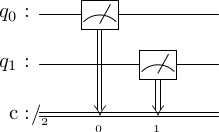

{'00': 10000}


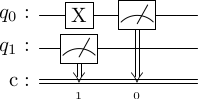

{'01': 10000}


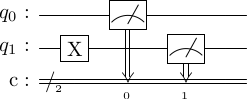

{'10': 10000}


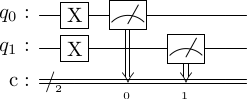

{'11': 10000}


In [45]:
for state in ['00','01','10','11']:
    qc = QuantumCircuit(2,2)
    if state[0]=='1':
        qc.x(1)
    if state[1]=='1':
        qc.x(0)  
    qc.measure(qc.qregs[0],qc.cregs[0])
    display(qc.draw(output="latex"))
#    print(state +' becomes',          transpile(qc, Aer.get_backend('qasm_simulator'),noise_model=noise_model,shots=10000).result().get_counts())
    print(device.run(qc,noise_model=noise_model,shots=10000).result().get_counts())

In [4]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
M = [[0.9809,0.0110,0.0095,0.0001],
    [0.0094,0.9784,0.0001,0.0107],
    [0.0096,0.0000,0.9814,0.0087],
    [0.0001,0.0106,0.0090,0.9805]]

Cideal = [[5000],
          [0],
          [0],
          [5000]]

Cnoisy = np.dot(M, Cideal)
print('C_noisy =\n', Cnoisy)

C_noisy =
 [[ 4905.0000]
 [ 100.5000]
 [ 91.5000]
 [ 4903.0000]]


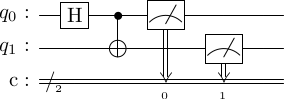

{'01': 97, '10': 94, '00': 4911, '11': 4898}


In [5]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)  
qc.measure(qc.qregs[0],qc.cregs[0])
display(qc.draw(output="latex"))
#print(execute(qc, Aer.get_backend('qasm_simulator'),
#              noise_model=noise_model,shots=10000).result().get_counts())
print(device.run(qc,noise_model=noise_model,shots=10000).result().get_counts())

In [6]:
import scipy.linalg as la
M = [[0.9809,0.0110,0.0095,0.0001],
    [0.0094,0.9784,0.0001,0.0107],
    [0.0096,0.0000,0.9814,0.0087],
    [0.0001,0.0106,0.0090,0.9805]]

Minv = la.inv(M)

print(Minv)

[[ 1.0197 -0.0115 -0.0099  0.0001]
 [-0.0098  1.0223  0.0001 -0.0112]
 [-0.0100  0.0002  1.0191 -0.0090]
 [ 0.0001 -0.0111 -0.0094  1.0201]]


In [7]:
Cmitigated = np.dot(Minv, Cnoisy)
print('C_mitigated =\n', Cmitigated)

C_mitigated =
 [[ 5000.0000]
 [ 0.0000]
 [-0.0000]
 [ 5000.0000]]


In [8]:
Cnoisy = [[4939],
          [99],
          [92],
          [4870]]
Cmitigated = np.dot(Minv, Cnoisy)
print('C_mitigated =\n', Cmitigated)

C_mitigated =
 [[ 5034.6777]
 [-1.4983]
 [ 0.4685]
 [ 4966.3521]]


## Quantum Teleportation

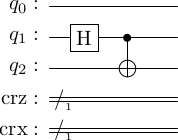

In [9]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers

qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different registers
teleportation_circuit = QuantumCircuit(qr, crz, crx)

def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target
    
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
# In our case, Telamon entangles qubits q1 and q2
# Let's apply this to our circuit:
create_bell_pair(teleportation_circuit, 1, 2)
# And view the circuit so far:
teleportation_circuit.draw(output="latex")



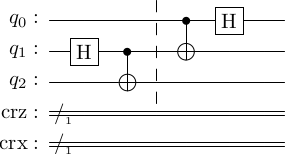

In [10]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)
    
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw(output="latex")

In [11]:
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

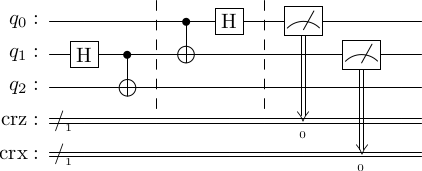

In [12]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
measure_and_send(teleportation_circuit, 0 ,1)
teleportation_circuit.draw(output="latex")

Bob, who already has the qubit $q_2$, then applies the following gates depending on the state of the classical bits:

00 $\rightarrow$ Do nothing

01 $\rightarrow$ Apply $X$ gate

10 $\rightarrow$ Apply $Z$ gate

11 $\rightarrow$ Apply $ZX$ gate

(*Note that this transfer of information is purely classical*.)

In [13]:
# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'

/tmp/ipykernel_2524/1747897734.py:6: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(qubit).c_if(crx, 1) # Apply gates if the registers
/tmp/ipykernel_2524/1747897734.py:7: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.z(qubit).c_if(crz, 1) # are in the state '1'


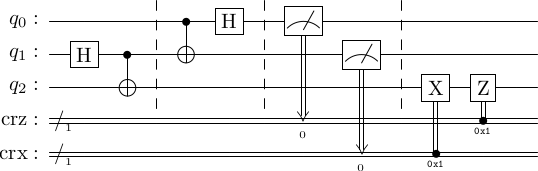

In [14]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
measure_and_send(teleportation_circuit, 0, 1)

## STEP 4
teleportation_circuit.barrier() # Use barrier to separate steps
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw(output="latex")

<IPython.core.display.Latex object>

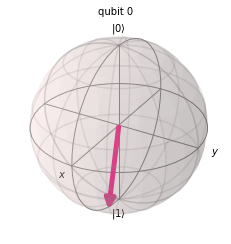

In [15]:
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.circuit.library import Initialize
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector
# Create random 1-qubit state
psi = random_statevector(2)

# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(psi)

In [16]:
#init_gate = Initialize(psi)
#init_gate.label = "init"

/tmp/ipykernel_2524/1747897734.py:6: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(qubit).c_if(crx, 1) # Apply gates if the registers
/tmp/ipykernel_2524/1747897734.py:7: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.z(qubit).c_if(crz, 1) # are in the state '1'


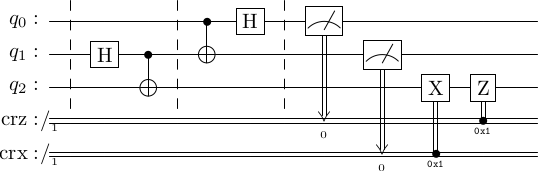

In [17]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
#qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

# Display the circuit
qc.draw(output="latex")

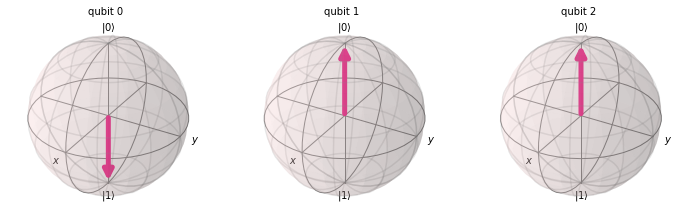

In [18]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)

In [19]:
#inverse_init_gate = init_gate.gates_to_uncompute()

/tmp/ipykernel_2524/1747897734.py:6: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(qubit).c_if(crx, 1) # Apply gates if the registers
/tmp/ipykernel_2524/1747897734.py:7: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.z(qubit).c_if(crz, 1) # are in the state '1'


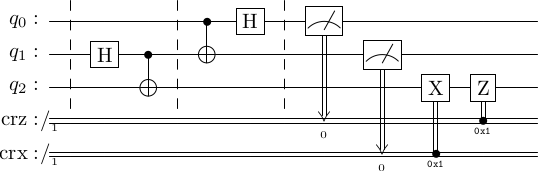

In [20]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
#qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

## STEP 5
# reverse the initialization process
#qc.append(inverse_init_gate, [2])

# Display the circuit
qc.draw(output="latex")

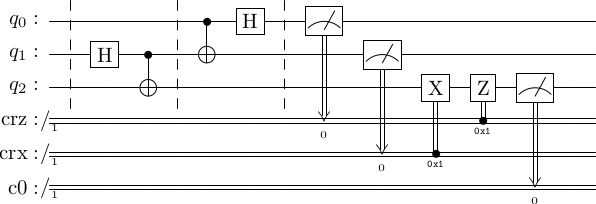

In [21]:
# Need to add a new ClassicalRegister
# to see the result
cr_result = ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)
qc.draw(output="latex")

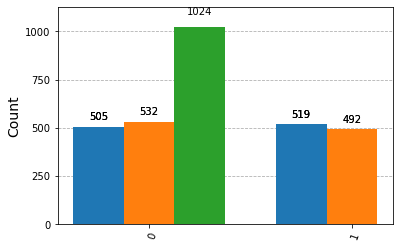

In [22]:
t_qc = transpile(qc, sim)
t_qc.save_statevector()
counts = sim.run(t_qc).result().get_counts()
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
plot_histogram(qubit_counts)

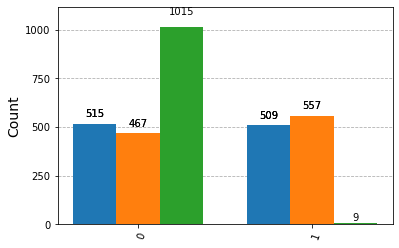

In [23]:
t_qc = transpile(qc, device)
t_qc.save_statevector()
counts = device.run(t_qc).result().get_counts()
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
plot_histogram(qubit_counts)

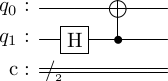

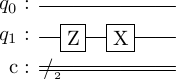

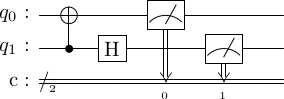

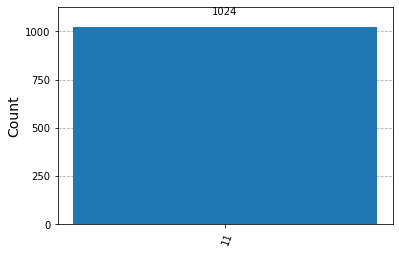

In [56]:
## The entangled way
qc_charlie = QuantumCircuit(2,2)

qc_charlie.h(1)
qc_charlie.cx(1,0)
qc.barrier()
display(qc_charlie.draw(output="latex"))


MESSAGE = '11'

qc_alice = QuantumCircuit(2,2)

if MESSAGE[-2]=='1':
    qc_alice.z(1)
if MESSAGE[-1]=='1':
    qc_alice.x(1)
qc.barrier()
display(qc_alice.draw(output="latex"))

qc_bob = QuantumCircuit(2,2)
# Bob disentangles
qc_bob.cx(1,0)
qc_bob.h(1)
# Then measures
qc_bob.measure([0,1],[0,1])

display(qc_bob.draw(output="latex"))

complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
complete_qc.draw(output="latex")

plot_histogram(sim.run(complete_qc).result().get_counts())

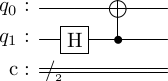

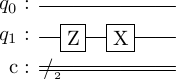

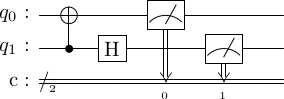

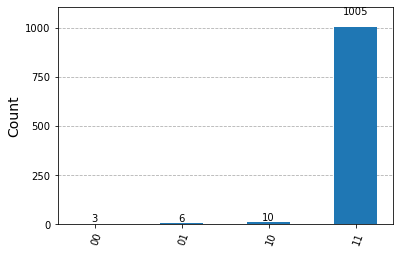

In [57]:
## The entangled way
qc_charlie = QuantumCircuit(2,2)

qc_charlie.h(1)
qc_charlie.cx(1,0)
qc.barrier()
display(qc_charlie.draw(output="latex"))


MESSAGE = '11'

qc_alice = QuantumCircuit(2,2)

if MESSAGE[-2]=='1':
    qc_alice.z(1)
if MESSAGE[-1]=='1':
    qc_alice.x(1)
qc.barrier()
display(qc_alice.draw(output="latex"))

qc_bob = QuantumCircuit(2,2)
# Bob disentangles
qc_bob.cx(1,0)
qc_bob.h(1)
# Then measures
qc_bob.measure([0,1],[0,1])

display(qc_bob.draw(output="latex"))

complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
complete_qc.draw(output="latex")

plot_histogram(device.run(complete_qc).result().get_counts())